数据探索与可视化

实验目标

学习并掌握如何使用Python进行数据探索与可视化。
理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

实验要求

1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。

3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

5.使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。
绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
绘制直方图：展示log_public_repos的对数变换后的数据分布。
绘制散点图：展示public_repos与followers之间的关系。
绘制散点矩阵：展示多个数值型特征之间的成对关系。

6.使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。
绘制成对图：展示不同特征之间的成对关系，并根据label分类。
绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
绘制小提琴图：展示label与log_followers之间的分布差异。

7.使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

Dataframe head:
   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                             bio  \
0                                                            NaN   
1  I just press the buttons randomly, and the program evolves...   
2                     Time is unimportant,\nonly life important.   
3                                                            NaN   
4                                                            NaN   

   public_repos  public_gists  followers  following  \
0            26             1          5          1   
1            30             3          9          6   
2           1

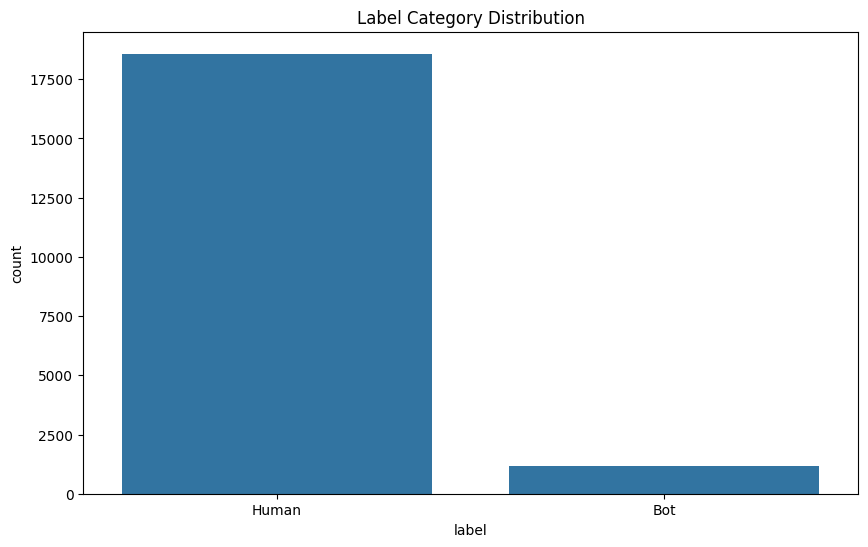

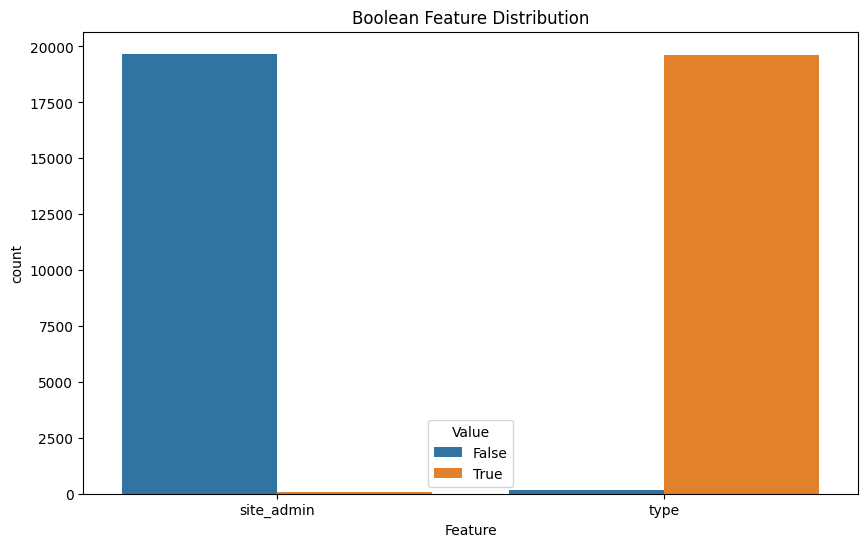

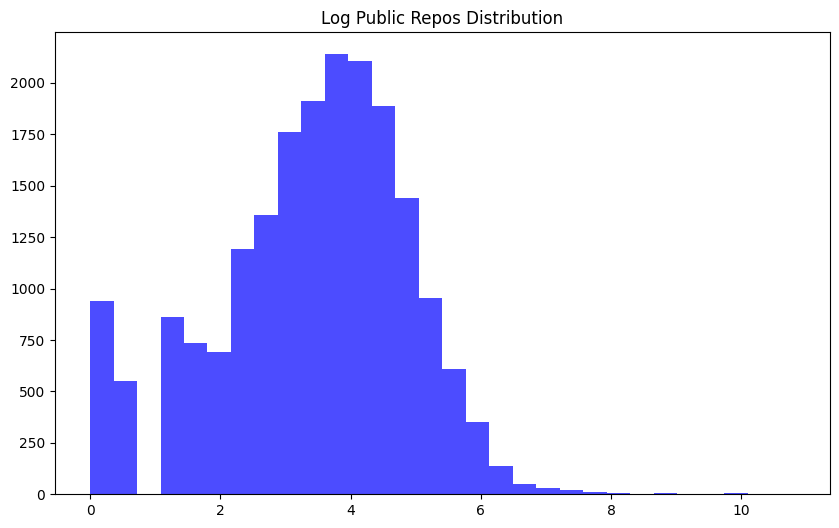

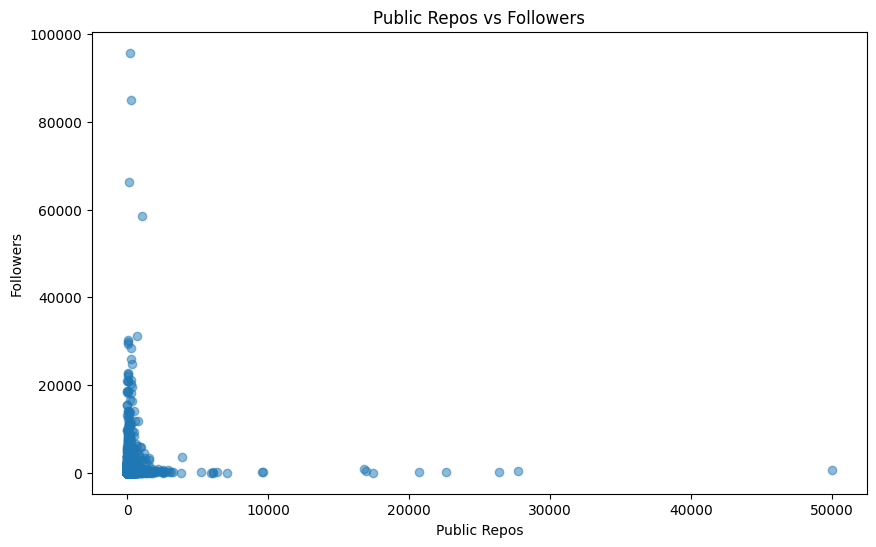

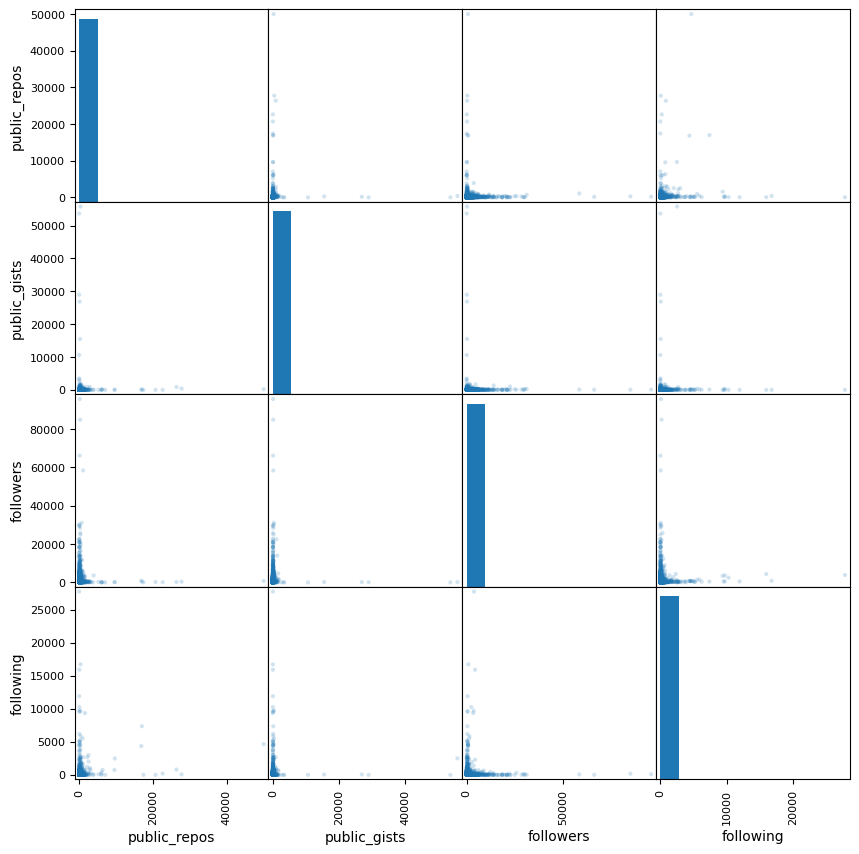

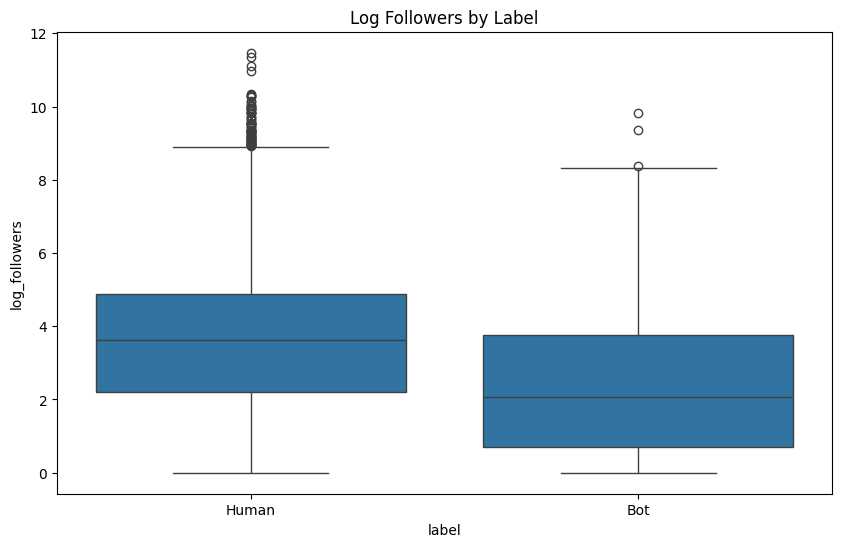

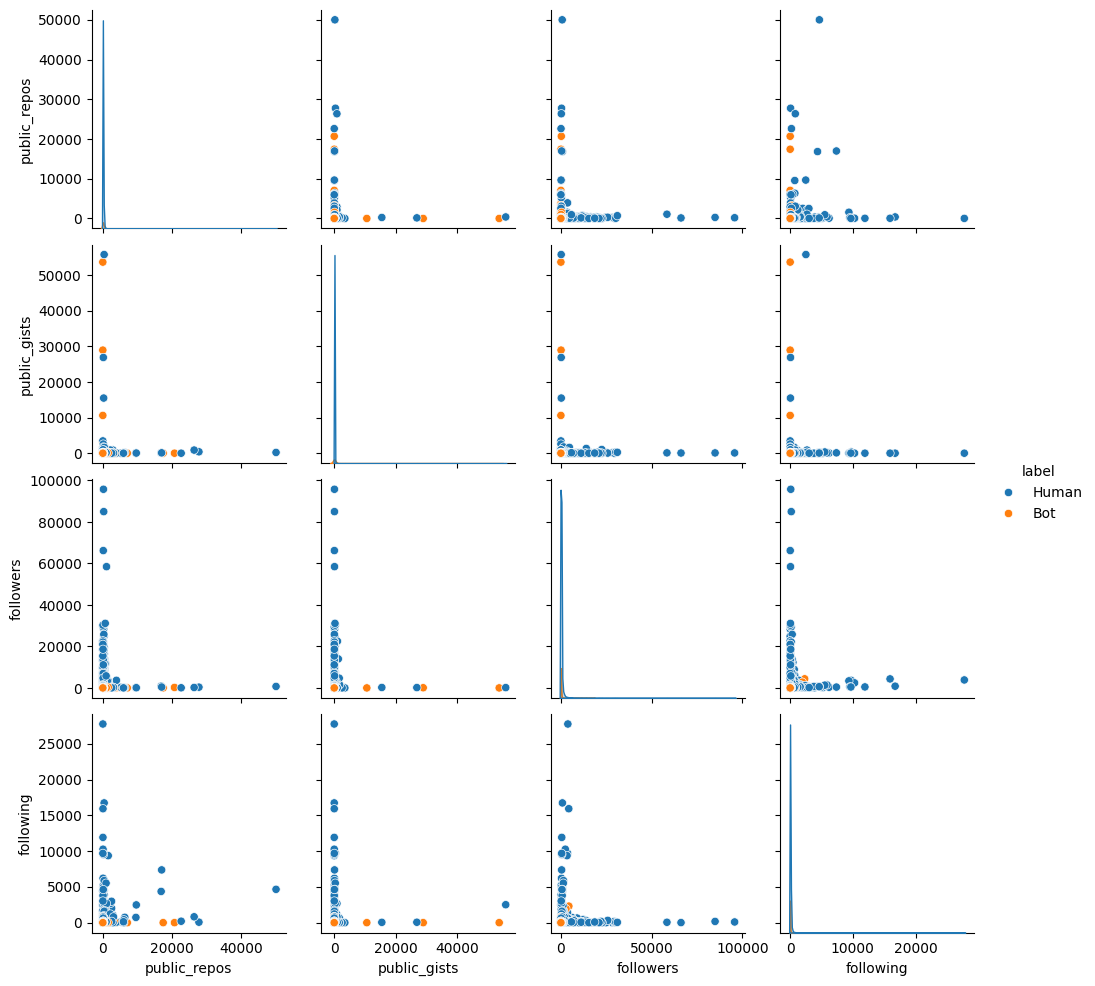

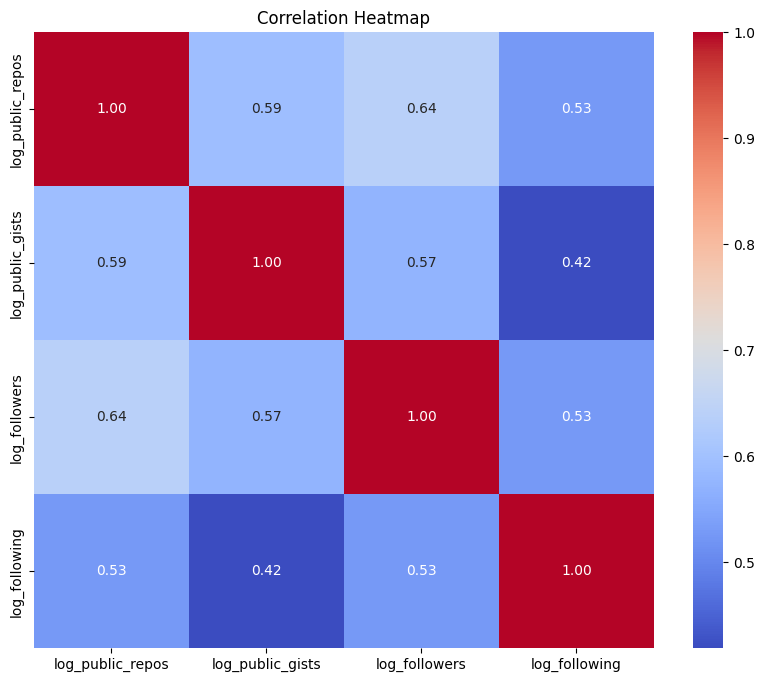

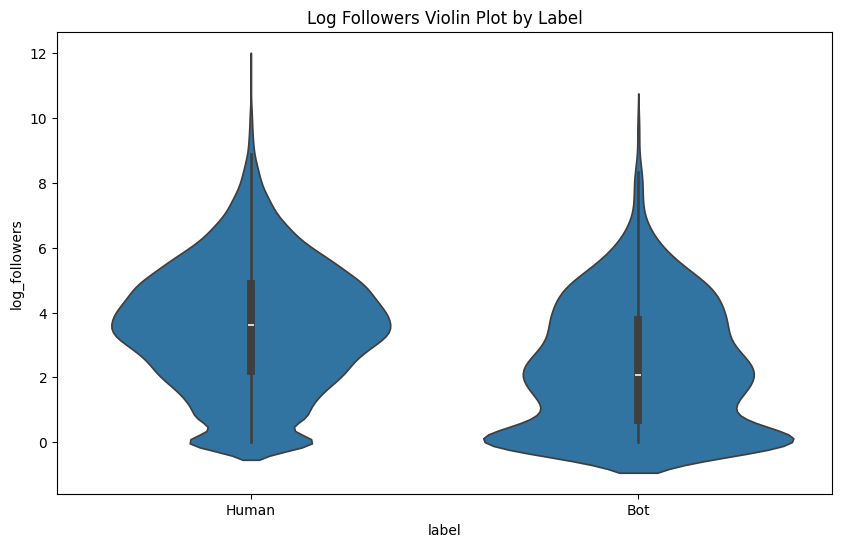

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport  

df = pd.read_csv("D:/github_bot_processed_data.csv")

# 设置pandas显示选项
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

# 数据探索
print("Dataframe head:")
print(df.head())

print("\nDataframe info:")
df.info()

print("\nDescriptive statistics:")
print(df.describe(include='all')) 

# 格式化日期时间列
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

# 对数变换
df['log_public_repos'] = np.log1p(df['public_repos'])
df['log_public_gists'] = np.log1p(df['public_gists'])
df['log_followers'] = np.log1p(df['followers'])
df['log_following'] = np.log1p(df['following'])

# 绘制图表
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=df)
plt.title('Label Category Distribution')
plt.show()

bool_features = ['site_admin', 'type']
df_bool = df[bool_features].melt(var_name='Feature', value_name='Value')
plt.figure(figsize=(10,6))
sns.countplot(x='Feature', hue='Value', data=df_bool)
plt.title('Boolean Feature Distribution')
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['log_public_repos'], bins=30, alpha=0.7, color='blue')
plt.title('Log Public Repos Distribution')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df['public_repos'], df['followers'], alpha=0.5)
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.title('Public Repos vs Followers')
plt.show()

numeric_features = ['public_repos', 'public_gists', 'followers', 'following']
pd.plotting.scatter_matrix(df[numeric_features], alpha=0.2, figsize=(10, 10), diagonal='hist')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('Log Followers by Label')
plt.show()

sns.pairplot(df, hue='label', vars=numeric_features)
plt.show()

correlation_matrix = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='label', y='log_followers', data=df)
plt.title('Log Followers Violin Plot by Label')
plt.show()

# 生成交互式数据分析报告
profile = ProfileReport(df, title="YData Profiling Report", explorative=True)